<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Contents: NLP Project - 2
1. [Part-A: Solution](#Part-A:-Solution)
2. [Part-B: Solution](#Part-B:-Solution)

# Part-A: Solution

- **DOMAIN:** Digital content and entertainment industry
- **CONTEXT:** The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to buildan embedding layer followed by a classification algorithm to analyse the sentiment of the customers.
- **Data Description:** The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.
- **PROJECT OBJECTIVE:** To Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

In [ ]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import zscore

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, plot_roc_curve 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

# from sklearn.decomposition import PCA
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.cluster.hierarchy import fcluster
# from sklearn.cluster import KMeans 
# from sklearn.metrics import silhouette_samples, silhouette_score

# import xgboost as xgb
# from xgboost import plot_importance
# from lightgbm import LGBMClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import pandas_profiling as pp

import gensim
import logging

# import cv2
# from google.colab.patches import cv2_imshow
# from glob import glob
# import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

from tensorflow import keras
from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings("ignore")

import random
from zipfile import ZipFile

# Set random_state
random_state = 42

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Current working directory
%cd "/content/drive/MyDrive/MGL/Project-NLP-2/"

# # List all the files in a directory
# for dirname, _, filenames in os.walk('path'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/content/drive/MyDrive/MGL/Project-NLP-2


In [ ]:
# List files in the directory
!ls

 1.ipynb	    'IMDB Dataset.csv.zip'	   'NLP FAQ Sequential-1.pdf'
 2.ipynb	    'Milestone-NLP 2.pdf'	   'REVALUATION POLICY-7.pdf'
 glove.6B.zip	     model.png
'IMDB Dataset.csv'  'NLP-2_Problem Statement.pdf'


## 1. Import and analyse the data set.
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

### Quick EDA for complete dataset

In [ ]:
# # Path of the data file
# path = 'IMDB Dataset.csv.zip'

# # Unzip files in the current directory

# with ZipFile (path,'r') as z:
#   z.extractall() 
# print("Training zip extraction done!")

In [ ]:
# Import the dataset
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# pd.set_option('display.max_colwidth', None)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Clear the matplotlib plotting backend
%matplotlib inline
plt.close('all')

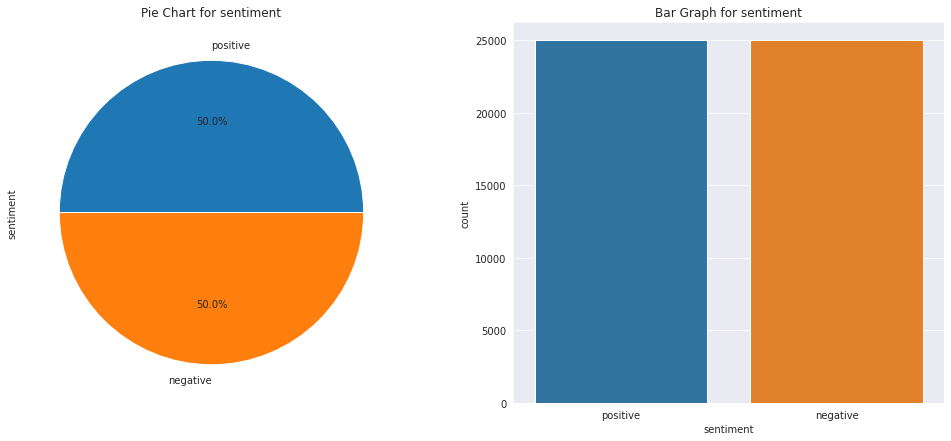

In [ ]:
# Understand the 'sentiment' the target vector
f,axes=plt.subplots(1,2,figsize=(17,7))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('sentiment',data=df,ax=axes[1])
axes[0].set_title('Pie Chart for sentiment')
axes[1].set_title('Bar Graph for sentiment')
plt.show()

The dataset consists of two groups:
- 25000 positive reviews
- 25000 negative reviews

Its evident that the dataset is very well balanced. This is a very favourable situation for a classification task.

Positive review:  'War movie' is a Hollywood genre that has been done and redone so many times that clichéd dialogue, rehashed plot and over-the-top action sequences seem unavoidable for any conflict dealing with large-scale combat. Once in a while, however, a war movie comes along that goes against the grain and brings a truly original and compelling story to life on the silver screen. The Civil War-era "Cold Mountain," starring Jude Law, Nicole Kidman and Renée Zellweger is such a film.<br /><br />Then again, calling Cold Mountain" a war movie is not entirely accurate. True enough, the film opens with a (quite literally) quick-and-dirty battle sequence that puts "Glory" director Edward Zwick shame. However, "Cold Mountain" is not so much about the Civil War itself as it is about the period and the people of the times. The story centers around disgruntled Confederate soldier Inman, played by Jude Law, who becomes disgusted with the gruesome war and homesick for the beautiful hamlet of

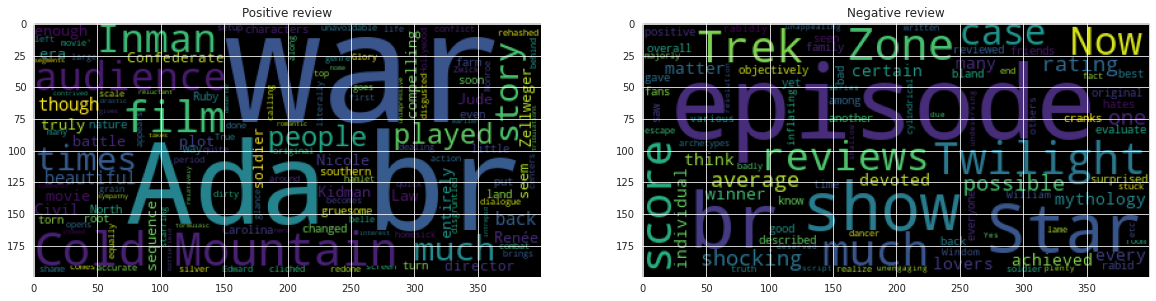

In [ ]:
# Visualize word cloud of random positive and negative review

# Choose randomly a positive review and a negative review
ind_positive = random.choice(list(df[df['sentiment'] == 'positive'].index))
ind_negative = random.choice(list(df[df['sentiment'] == 'negative'].index))

review_positive = df['review'][ind_positive]
review_negative = df['review'][ind_negative]

print('Positive review: ', review_positive)
print('\n')
print('Negative review: ', review_negative)
print('\n')

from wordcloud import WordCloud
cloud_positive = WordCloud().generate(review_positive)
cloud_negative = WordCloud().generate(review_negative)

plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.imshow(cloud_positive)
plt.title('Positive review')

plt.subplot(1,2,2)
plt.imshow(cloud_negative)
plt.title('Negative review')
plt.show()

In [ ]:
# Text Cleaning
import re

def remove_url(text):
    url_tag = re.compile(r'https://\S+|www\.\S+')
    text = url_tag.sub(r'', text)
    return text

def remove_html(text):
    html_tag = re.compile(r'<.*?>')
    text = html_tag.sub(r'', text)
    return text

def remove_punctuation(text): 
    punct_tag = re.compile(r'[^\w\s]')
    text = punct_tag.sub(r'', text) 
    return text

def remove_special_character(text):
    special_tag = re.compile(r'[^a-zA-Z0-9\s]')
    text = special_tag.sub(r'', text)
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text    
    
def clean_text(text):
    text = remove_url(text)
    text = remove_html(text)
    text = remove_punctuation(text)
    text = remove_special_character(text)
    text = remove_emojis(text)
    text = text.lower()
    
    return text

In [ ]:
df['processed'] = df['review'].apply(lambda x: clean_text(x))
df['label'] = df['sentiment'].apply(lambda x: 0 if x == 'negative' else 1)
df.head()

,review,sentiment,processed,label
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,1


In [ ]:
# df = df.sample(n=1000, random_state = 0)

In [ ]:
# Create the features matrix and target vector
df1=df[['processed', 'label']]
df1.head()

,processed,label
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
# Split the data for training and testing
# To be used in the transformers (BERT)
train, test = train_test_split(df1, test_size=0.5, random_state=0)

### Using the imdb.load_data() method

In [ ]:
# Loading the IMDB dataset
# The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. 
# The rare words are discarded to keep the size of the data manageable.

top_words = 10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(path="imdb.npz",
                                                      num_words=top_words)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

## 2. Perform relevant sequence adding on the data.

## 3. Perform following data analysis:
- Print shape of features and labels
- Print value of any one feature and it's label

## 4. Decode the feature value to get original sentence

### Considering the above 2nd, 3rd, and 4th parts together in below code cells:

Let's take a moment to understand the format of the data. The dataset comes preprocessed: each example is an array of integers representing the words of the movie review. Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

In [ ]:
# Shape of training data
print("X_train: {}, y_train: {}".format(len(X_train),len(y_train)))

X_train: 25000, y_train: 25000


In [ ]:
# Shape of test data
print("X_test: {}, y_test: {}".format(len(X_test),len(y_test)))

X_test: 25000, y_test: 25000


In [ ]:
# The text of reviews have been converted to integers, where each integer represents a specific word in a dictionary. 
# Looking at the first review
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
# Movie reviews may be different lengths. The below code shows the number of words in the first and second reviews. 
# Since inputs to a NN/RNN must be the same length, we'll need to resolve this later.
len(X_train[0]), len(X_train[1])

(218, 189)

In [ ]:
# Convert integers back to text: Here, we'll create a helper function to query a dictionary object that contains the integer to string mapping:

# A dictionary mapping words to an integer index
imdb = keras.datasets.imdb
word_index = imdb.get_word_index()

# The first indices are reserved

word_index = {k:(v+3) for k,v in word_index.items()}

word_index["<PAD>"] =0
word_index["<START>"]=1
word_index["<UNK>"]=2 #unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decode_review(X_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [ ]:
decode_review(X_train[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

The reviews (intteger arrays) must be converted to tensors before fed into the neural network. This conversion can be done in many ways:

- One-hot-encode the arrays to convert them into vectors of 0s and 1s. For example, the sequence [1, 5, 6] would become a 10,000-dimensional vector that is all zeros except for indices at 1, 5 and 6, which are ones. Then, make this the first layer in our network—a Dense layer—that can handle floating point vector data. This approach is memory intensive, though, requiring a num_words * num_reviews size matrix.


- Another method, we can pad the arrays so that they all have the same length, then create an integer tensor of shape max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network. Since the movie reviews must be the same length, we will use the pad_sequences function to standardize the lengths.

In [ ]:
# pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning
# of each sequence until each sequence has the same length as the longest sequence.

#Since the sequences have different lengtht, then we use padding method to put all sequences to the same length. 
#The parameter "maxlen" sets the maximum length of the output sequence. 

# If length of the input sequence is larger than "maxlen", then it is trunced to keep only #maxlen words, (truncating = 'pre': keep the 
# previous part of the sequence; truncating = 'post': keep the posterior part of the sequence).

# If length of the input sequence is smaller than "maxlen", then 0 elements will be padded into the previous part of sequence 
# (if padding = 'pre' - by defaut) or in the tail of the sequence (if padding = 'post').

max_length = 256
trunc_type = 'post'

X_train = keras.preprocessing.sequence.pad_sequences(X_train, value=word_index["<PAD>"],padding="post",maxlen = max_length, truncating = trunc_type)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, value=word_index["<PAD>"],padding="post",maxlen = max_length, truncating = trunc_type)

In [ ]:
# Check the length of reviews again
len(X_train[0]), len(X_train[1])

(256, 256)

In [ ]:
# Check the first review after padding
X_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

## 5. Design, train, tune and test a sequential model.
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model.

### ANN

In [ ]:
# Input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000
embedding_dim = 16
max_length = 256

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/10
196/196 [==============================] - 37s 162ms/step - loss: 0.6659 - accuracy: 0.6778 - val_loss: 0.6032 - val_accuracy: 0.7760
Epoch 2/10
196/196 [==============================] - 15s 77ms/step - loss: 0.4866 - accuracy: 0.8292 - val_loss: 0.4177 - val_accuracy: 0.8423
Epoch 3/10
196/196 [==============================] - 10s 51ms/step - loss: 0.3396 - accuracy: 0.8758 - val_loss: 0.3461 - val_accuracy: 0.8603
Epoch 4/10
196/196 [==============================] - 7s 34ms/step - loss: 0.2774 - accuracy: 0.8951 - val_loss: 0.3198 - val_accuracy: 0.8689
Epoch 5/10
196/196 [==============================] - 7s 34ms/step - loss: 0.2417 - accuracy: 0.9088 - val_loss: 0.3118 - val_accuracy: 0.8717
Epoch 6/10
196/196 [==============================] - 4s 21ms/step - loss: 0.2173 - accuracy: 0.9192 - val_loss: 0.3045 - val_accuracy: 0.8767
Epoch 7/10
196/196 [==============================] - 4s 21ms/step - loss: 0.1969 - accuracy: 0.9282 - val_loss: 0.3086 - val_accuracy: 0.

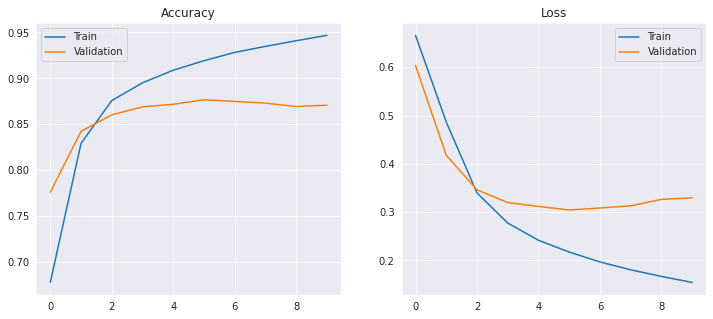

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

782/782 [==============================] - 1s 1ms/step


Classification Accuracy:
782/782 [==============================] - 2s 2ms/step - loss: 0.1397 - accuracy: 0.9546
Loss and Accuracy on Training data: [0.13974815607070923, 0.9546399712562561]
782/782 [==============================] - 2s 2ms/step - loss: 0.3296 - accuracy: 0.8708
Loss and Accuracy on Test data: [0.32960832118988037, 0.8707600235939026]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     12500
           1       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Confusion Matrix Chart:


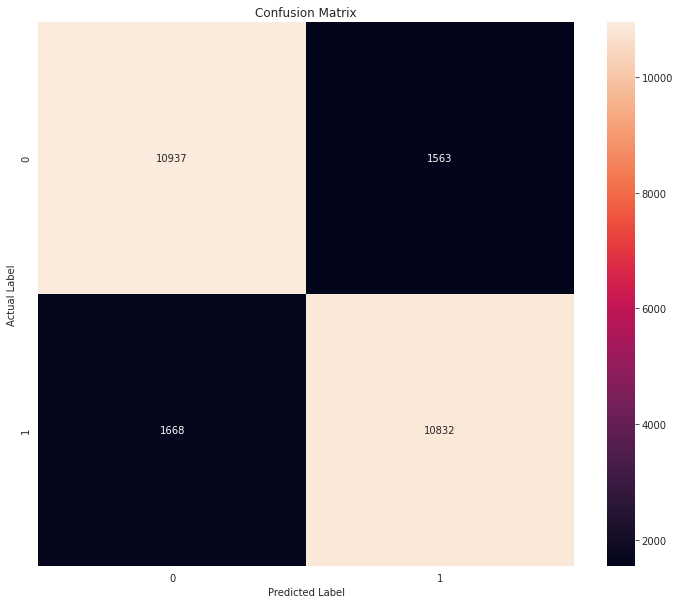

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

base_1 = []
base_1.append(['ANN', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

782/782 [==============================] - 2s 2ms/step - loss: 0.3296 - accuracy: 0.8708


In [ ]:
# An approach for predicted and actual labels
for i in range(5):
  print(decode_review(X_test[i]))
  pred = model.predict(X_test[i].reshape(1, 256))
  print('Prediction prob = ', pred, '\t Actual =', y_test[i])

<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

### RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, AveragePooling1D, Bidirectional, LSTM, SimpleRNN, Dense

vocab_size = 10000
embedding_dim = 16
max_length = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(AveragePooling1D(pool_size = 2))
# model.add(Bidirectional(SimpleRNN(32, dropout = 0.5)))
model.add((SimpleRNN(32, dropout = 0.5)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test), verbose=1)

Epoch 1/10
196/196 [==============================] - 58s 263ms/step - loss: 0.6948 - accuracy: 0.4960 - val_loss: 0.6933 - val_accuracy: 0.5015
Epoch 2/10
196/196 [==============================] - 46s 234ms/step - loss: 0.6902 - accuracy: 0.5303 - val_loss: 0.6936 - val_accuracy: 0.5032
Epoch 3/10
196/196 [==============================] - 45s 228ms/step - loss: 0.6801 - accuracy: 0.5534 - val_loss: 0.6950 - val_accuracy: 0.5063
Epoch 4/10
196/196 [==============================] - 40s 202ms/step - loss: 0.6437 - accuracy: 0.5886 - val_loss: 0.7211 - val_accuracy: 0.4956
Epoch 5/10
196/196 [==============================] - 40s 206ms/step - loss: 0.5776 - accuracy: 0.6360 - val_loss: 0.7716 - val_accuracy: 0.5038
Epoch 6/10
196/196 [==============================] - 50s 255ms/step - loss: 0.5253 - accuracy: 0.6641 - val_loss: 0.8398 - val_accuracy: 0.5025
Epoch 7/10
196/196 [==============================] - 37s 187ms/step - loss: 0.4871 - accuracy: 0.6875 - val_loss: 0.9328 - val_ac

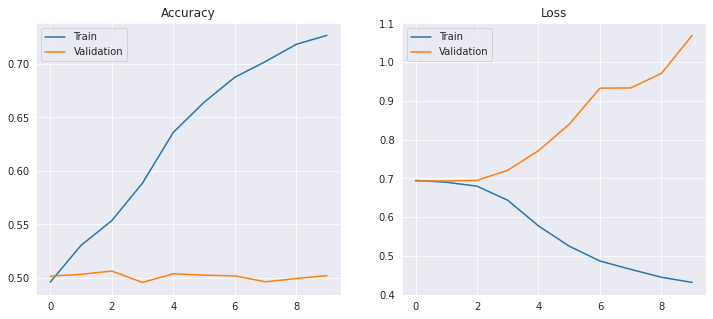

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

782/782 [==============================] - 11s 14ms/step


Classification Accuracy:
782/782 [==============================] - 10s 12ms/step - loss: 0.3803 - accuracy: 0.7723
Loss and Accuracy on Training data: [0.3802814185619354, 0.7723199725151062]
782/782 [==============================] - 11s 14ms/step - loss: 1.0690 - accuracy: 0.5021
Loss and Accuracy on Test data: [1.069017767906189, 0.5020800232887268]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49     12500
           1       0.50      0.53      0.51     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000

Confusion Matrix Chart:


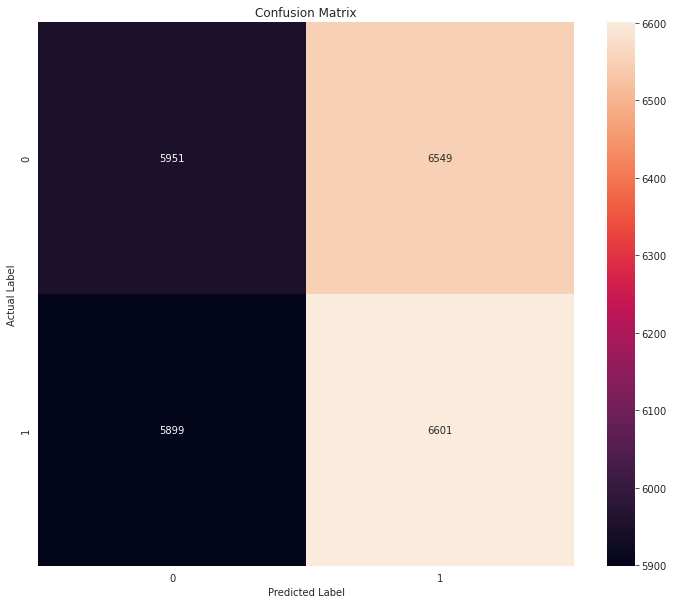

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['RNN', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

782/782 [==============================] - 10s 12ms/step - loss: 1.0690 - accuracy: 0.5021


### GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, AveragePooling1D, Bidirectional, LSTM, SimpleRNN, GRU, Dense

vocab_size = 10000
embedding_dim = 16
max_length = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(AveragePooling1D(pool_size = 2))
# model.add(Bidirectional(GRU(32, dropout = 0.5)))
model.add((GRU(32, dropout = 0.5)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test), verbose=1)

Epoch 1/10
196/196 [==============================] - 25s 110ms/step - loss: 0.6931 - accuracy: 0.4998 - val_loss: 0.6926 - val_accuracy: 0.5123
Epoch 2/10
196/196 [==============================] - 13s 65ms/step - loss: 0.5302 - accuracy: 0.7149 - val_loss: 0.3926 - val_accuracy: 0.8400
Epoch 3/10
196/196 [==============================] - 10s 51ms/step - loss: 0.2852 - accuracy: 0.8911 - val_loss: 0.3305 - val_accuracy: 0.8644
Epoch 4/10
196/196 [==============================] - 8s 40ms/step - loss: 0.2116 - accuracy: 0.9240 - val_loss: 0.3274 - val_accuracy: 0.8690
Epoch 5/10
196/196 [==============================] - 6s 30ms/step - loss: 0.1682 - accuracy: 0.9420 - val_loss: 0.3620 - val_accuracy: 0.8621
Epoch 6/10
196/196 [==============================] - 5s 26ms/step - loss: 0.1424 - accuracy: 0.9539 - val_loss: 0.4128 - val_accuracy: 0.8568
Epoch 7/10
196/196 [==============================] - 6s 32ms/step - loss: 0.1172 - accuracy: 0.9619 - val_loss: 0.4438 - val_accuracy: 0.

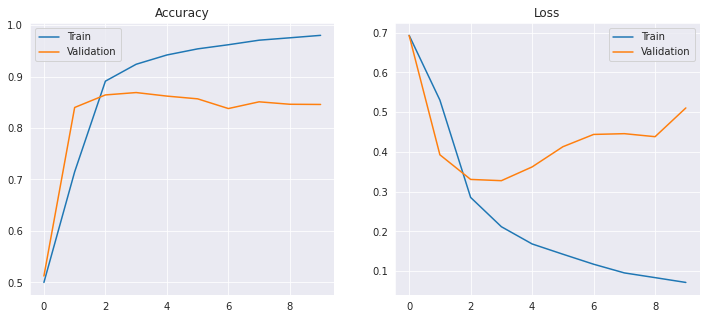

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

782/782 [==============================] - 3s 3ms/step


Classification Accuracy:
782/782 [==============================] - 3s 4ms/step - loss: 0.0559 - accuracy: 0.9868
Loss and Accuracy on Training data: [0.05585106462240219, 0.986840009689331]
782/782 [==============================] - 3s 4ms/step - loss: 0.5104 - accuracy: 0.8458
Loss and Accuracy on Test data: [0.5104315876960754, 0.8458399772644043]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84     12500
           1       0.83      0.87      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Confusion Matrix Chart:


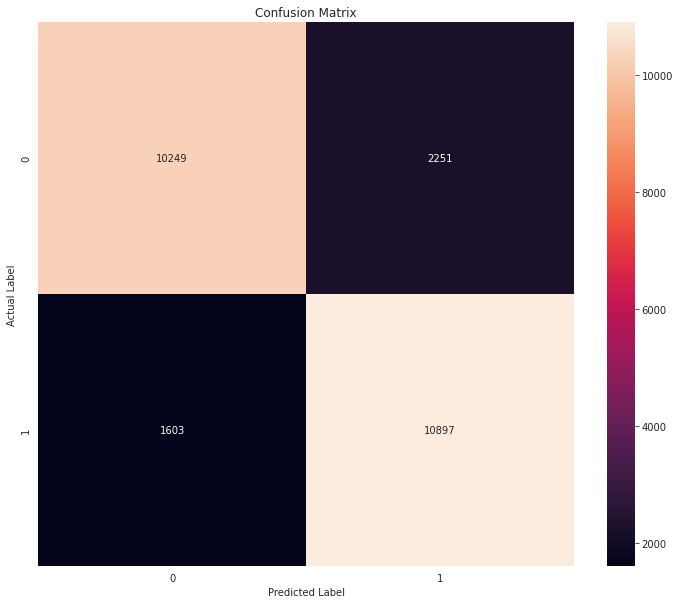

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['GRU', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

782/782 [==============================] - 3s 4ms/step - loss: 0.5104 - accuracy: 0.8458


### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, AveragePooling1D, Bidirectional, LSTM, Dense

vocab_size = 10000
embedding_dim = 16
max_length = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(AveragePooling1D(pool_size = 2))
# model.add(Bidirectional(LSTM(32, dropout = 0.5)))
model.add((LSTM(32, dropout = 0.5)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test), verbose=1)

Epoch 1/10
196/196 [==============================] - 23s 106ms/step - loss: 0.6890 - accuracy: 0.5211 - val_loss: 0.6461 - val_accuracy: 0.6796
Epoch 2/10
196/196 [==============================] - 14s 72ms/step - loss: 0.6532 - accuracy: 0.6355 - val_loss: 0.6937 - val_accuracy: 0.5099
Epoch 3/10
196/196 [==============================] - 10s 50ms/step - loss: 0.6877 - accuracy: 0.5196 - val_loss: 0.6901 - val_accuracy: 0.5106
Epoch 4/10
196/196 [==============================] - 8s 40ms/step - loss: 0.6744 - accuracy: 0.5472 - val_loss: 0.6212 - val_accuracy: 0.6864
Epoch 5/10
196/196 [==============================] - 6s 30ms/step - loss: 0.6710 - accuracy: 0.5767 - val_loss: 0.6817 - val_accuracy: 0.5437
Epoch 6/10
196/196 [==============================] - 5s 27ms/step - loss: 0.6416 - accuracy: 0.6128 - val_loss: 0.5777 - val_accuracy: 0.7240
Epoch 7/10
196/196 [==============================] - 4s 23ms/step - loss: 0.5502 - accuracy: 0.7409 - val_loss: 0.6071 - val_accuracy: 0.

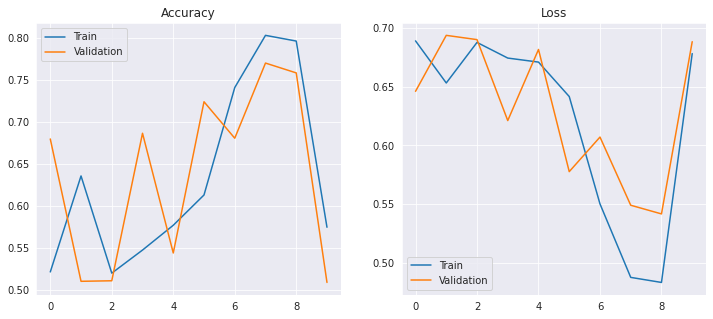

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

782/782 [==============================] - 3s 4ms/step


Classification Accuracy:
782/782 [==============================] - 4s 5ms/step - loss: 0.6718 - accuracy: 0.5417
Loss and Accuracy on Training data: [0.6718079447746277, 0.5416799783706665]
782/782 [==============================] - 4s 5ms/step - loss: 0.6883 - accuracy: 0.5086
Loss and Accuracy on Test data: [0.6883372068405151, 0.5085600018501282]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.74      0.60     12500
           1       0.52      0.28      0.36     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.48     25000
weighted avg       0.51      0.51      0.48     25000

Confusion Matrix Chart:


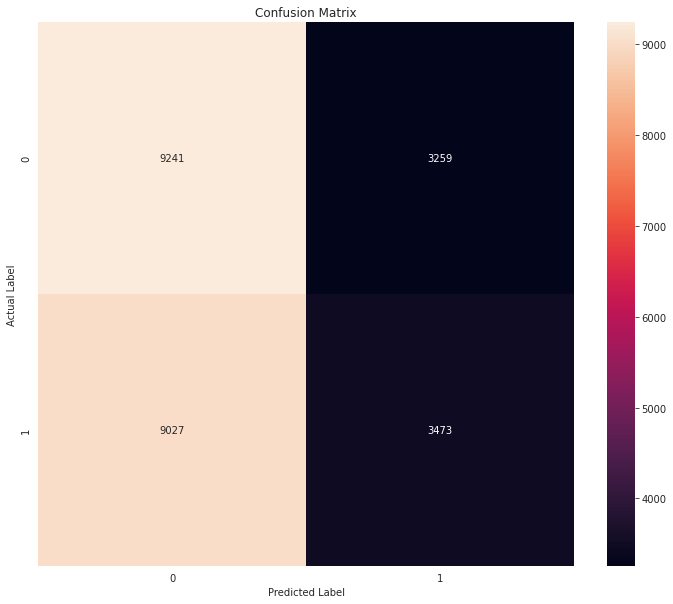

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['LSTM', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

782/782 [==============================] - 4s 5ms/step - loss: 0.6883 - accuracy: 0.5086


### Logistic Regression

Classification Accuracy:
Accuracy on Training data: 0.5434
Accuracy on Test data: 0.50824

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.40      0.45     12500
           1       0.51      0.61      0.55     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.50     25000
weighted avg       0.51      0.51      0.50     25000

Confusion Matrix Chart:


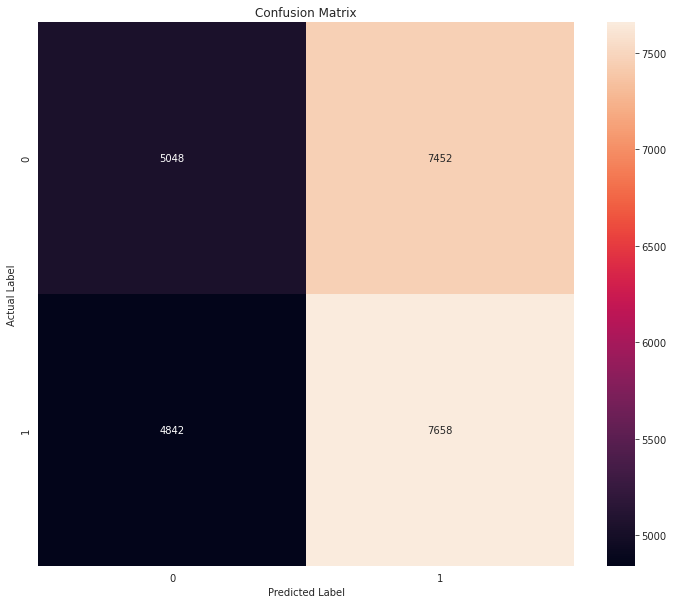

In [ ]:
# Build the model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.score(X_train, y_train)
Test_Accuracy = model.score(X_test, y_test)

# base_1 = []
base_1.append(['Logistic Regression', Train_Accuracy, Test_Accuracy, precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

### KNN

Classification Accuracy:
Accuracy on Training data: 0.6864
Accuracy on Test data: 0.50252

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52     12500
           1       0.50      0.47      0.48     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000

Confusion Matrix Chart:


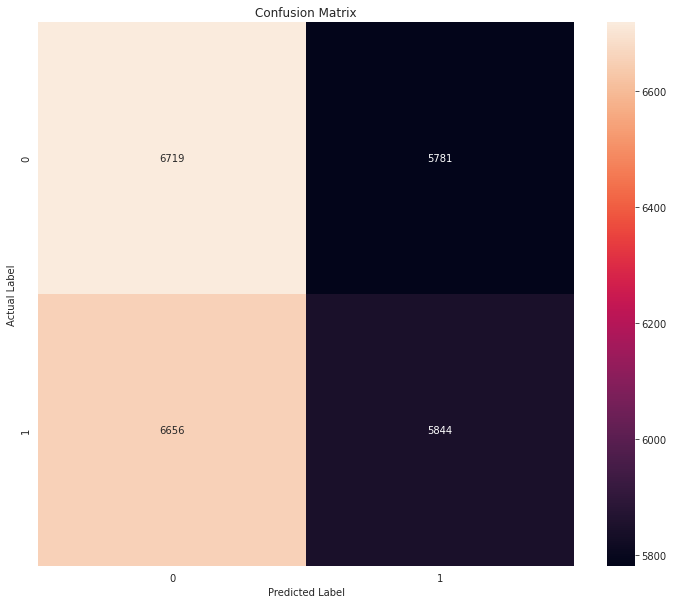

In [ ]:
# Build the model
model = KNeighborsClassifier()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.score(X_train, y_train)
Test_Accuracy = model.score(X_test, y_test)

# base_1 = []
base_1.append(['K Neighbors', Train_Accuracy, Test_Accuracy, precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

### SVM

Classification Accuracy:
Accuracy on Training data: 0.82956
Accuracy on Test data: 0.52644

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55     12500
           1       0.53      0.47      0.50     12500

    accuracy                           0.53     25000
   macro avg       0.53      0.53      0.53     25000
weighted avg       0.53      0.53      0.53     25000

Confusion Matrix Chart:


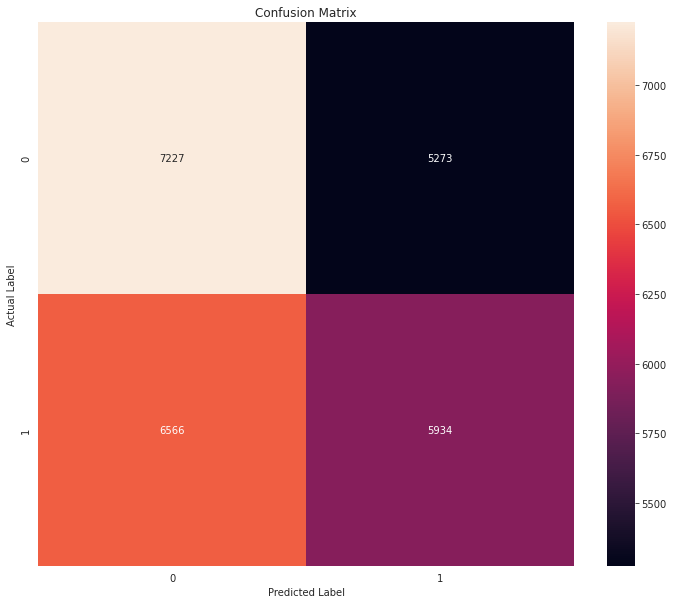

In [ ]:
# Build the model
model = SVC()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.score(X_train, y_train)
Test_Accuracy = model.score(X_test, y_test)

# base_1 = []
base_1.append(['SVM', Train_Accuracy, Test_Accuracy, precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

### Multinomial NB

Classification Accuracy:
Accuracy on Training data: 0.54076
Accuracy on Test data: 0.5078

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.56      0.53     12500
           1       0.51      0.46      0.48     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000

Confusion Matrix Chart:


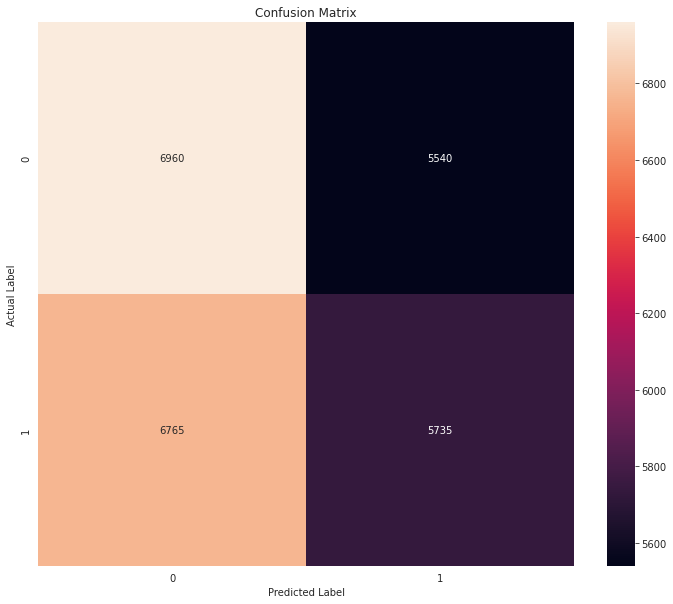

In [ ]:
# Build the model
model = MultinomialNB()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.score(X_train, y_train)
Test_Accuracy = model.score(X_test, y_test)

# base_1 = []
base_1.append(['Multinomial NB', Train_Accuracy, Test_Accuracy, precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

### Decision Tree

Classification Accuracy:
Accuracy on Training data: 1.0
Accuracy on Test data: 0.50896

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51     12500
           1       0.51      0.51      0.51     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000

Confusion Matrix Chart:


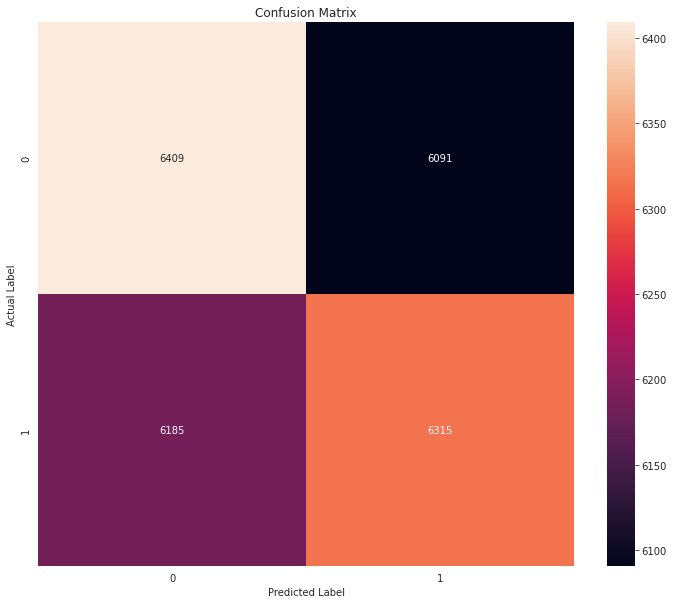

In [ ]:
# Build the model
model = DecisionTreeClassifier()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.score(X_train, y_train)
Test_Accuracy = model.score(X_test, y_test)

# base_1 = []
base_1.append(['Decision Tree', Train_Accuracy, Test_Accuracy, precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

### Random Forest

Classification Accuracy:
Accuracy on Training data: 1.0
Accuracy on Test data: 0.53252

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55     12500
           1       0.54      0.49      0.51     12500

    accuracy                           0.53     25000
   macro avg       0.53      0.53      0.53     25000
weighted avg       0.53      0.53      0.53     25000

Confusion Matrix Chart:


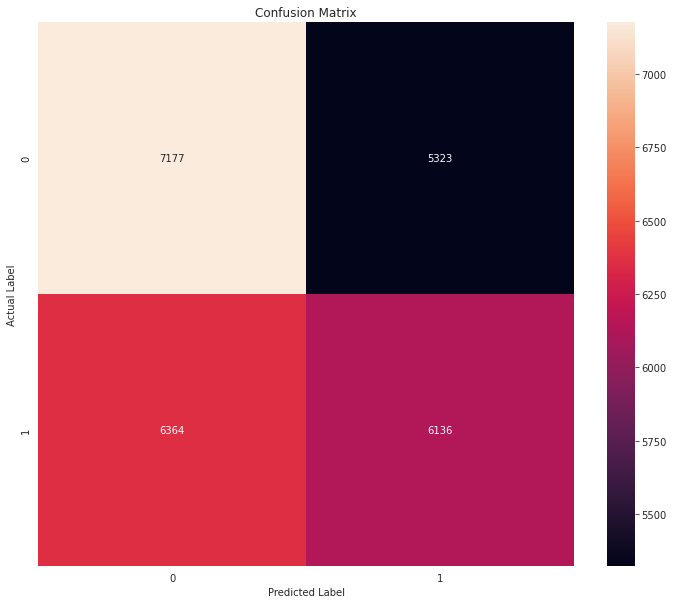

In [ ]:
# Build the model
model = RandomForestClassifier()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.score(X_train, y_train)
Test_Accuracy = model.score(X_test, y_test)

# base_1 = []
base_1.append(['Random Forest', Train_Accuracy, Test_Accuracy, precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

### Ada Boost

Classification Accuracy:
Accuracy on Training data: 0.581
Accuracy on Test data: 0.53596

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55     12500
           1       0.54      0.50      0.52     12500

    accuracy                           0.54     25000
   macro avg       0.54      0.54      0.54     25000
weighted avg       0.54      0.54      0.54     25000

Confusion Matrix Chart:


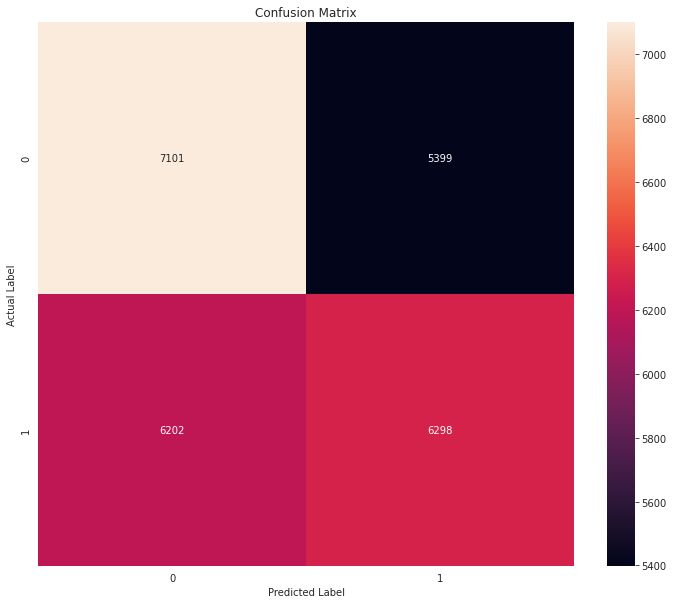

In [ ]:
# Build the model
model = AdaBoostClassifier()
# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Model Comparison

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.score(X_train, y_train)
Test_Accuracy = model.score(X_test, y_test)

# base_1 = []
base_1.append(['Ada Boost', Train_Accuracy, Test_Accuracy, precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)
model_comparison

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,ANN,0.95464,0.87076,0.870786,0.87076,0.870758
2,GRU,0.98684,0.84584,0.846772,0.84584,0.845736
10,Ada Boost,0.58100,0.53596,0.536109,0.53596,0.535481
9,Random Forest,1.00000,0.53252,0.532747,0.53252,0.531708
6,SVM,0.82956,0.52644,0.526726,0.52644,0.525170
8,Decision Tree,1.00000,0.50896,0.508961,0.50896,0.508953
3,LSTM,0.54168,0.50856,0.510876,0.50856,0.480929
4,Logistic Regression,0.54340,0.50824,0.508616,0.50824,0.502821
7,Multinomial NB,0.54076,0.50780,0.507876,0.50780,0.506615
5,K Neighbors,0.68640,0.50252,0.502532,0.50252,0.501910


### BERT

In [ ]:
# Install Transformers library
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.0 MB/s eta 0:00:00


In [ ]:
# Load the BERT Classifier and Tokenizer alıng with Input modules
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# We have the main BERT model, a dropout layer to prevent overfitting, and finally a dense layer for classification task:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We have two pandas Dataframe objects waiting for us to convert them into suitable objects for the BERT model. 
# We will take advantage of the InputExample function that helps us to create sequences from our dataset. 
# The InputExample function can be called as follows:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

Now we will create two main functions:
1. convert_data_to_examples: This will accept our train and test datasets and convert each row into an InputExample object.
2. convert_examples_to_tf_dataset: This function will tokenize the InputExample objects, then create the required input format with the tokenized objects, finally, create an input dataset that we can feed to the model.

In [ ]:
def convert_data_to_examples(train, test, processed, label): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[processed], 
                                                          text_b = None,
                                                          label = x[label]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[processed], 
                                                          text_b = None,
                                                          label = x[label]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'processed', 
                                                                           'label')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


processed = 'processed'
label = 'label'

In [ ]:
# Our dataset containing processed input sequences are ready to be fed to the model.
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, processed, label)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

In [ ]:
# We will use Adam as our optimizer, CategoricalCrossentropy as our loss function, and SparseCategoricalAccuracy as our accuracy metric. 
# Fine-tuning the model for 2 epochs will give us around 90% accuracy, which is great.

# Training the model might take a while, so ensure you enabled the GPU acceleration from the Notebook Settings.

%%time

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

H = model.fit(train_data, epochs=2, validation_data=validation_data)

# 50 min for maxlen = 128

Epoch 1/2
1564/1564 [==============================] - 1544s 952ms/step - loss: 0.2533 - accuracy: 0.8938 - val_loss: 0.3117 - val_accuracy: 0.8928
Epoch 2/2
1564/1564 [==============================] - 1523s 974ms/step - loss: 0.0705 - accuracy: 0.9759 - val_loss: 0.4324 - val_accuracy: 0.8890
CPU times: user 25min 45s, sys: 9min 23s, total: 35min 9s
Wall time: 52min 6s


## 6. Use the designed model to print the prediction on any one sample.

In [ ]:
# Making Predictions
# I created a list of two reviews I created. The first one is a positive review, while the second one is clearly negative.
pred_sentences = ['This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good',
                  'One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie']

In [ ]:
# We need to tokenize our reviews with our pre-trained BERT tokenizer. We will then feed these tokenized sequences to our model
# and run a final softmax layer to get the predictions. We can then use the argmax function to determine whether our sentiment 
# prediction for the review is positive or negative. Finally, we will print out the results with a simple for loop. 
# The following lines do all of these said operations:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good : 
 Positive
One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie : 
 Negative


In [ ]:
# Using the BERT on 5 test samples
predict_set = test[0:5]
pred_sentences = list(predict_set['processed'])

tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

john cassavetes is on the run from the law he is at the bottom of the heap he sees negro sidney poitier as his equal and they quickly become friends forming a sort of alliance against a bully of a foreman played by jack wardenas someone who has worked in a warehouse myself when i was younger i can tell you that the warehouse fights complete with tumbling packing cases and flailing grappling hooks are as realistic as it gets ive been in fights like these myself although no one got killedthe introduction of sidney poitiers widow is a variation on shakespeares shylock do i not bleed this is an anti racist film which at the time was much neededall the three principle characters  warden cassavetes and poitier  are superb with warden the most outstanding of the three : 
 Positive
its not just that the movie is lame its more than that this movie is just unnecessary do we need another western how about a western with afroamericans in the titles roles sound stupid implausible and a lame attempt

## Conclusion

In this project, we have learned how to clean and prepare the text data to feed into various ML/DL Models.

We have compared the performance of various ML/DL models with precision, recall, F1 and Accuracies (Train and Test).

There are several ideas that we can try to improve the model performance:

- We can change dimension of the embedding layer
- Hyperparameter tuning of various models
- Different vectorization mehtods can also be tested
- Text cleaning can further improve the model performance
- More advanced transformers can also be tried in this project

# Part-B: Solution

- **DOMAIN:** Social media analytics
- **CONTEXT:** Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.
- **DATA DESCRIPTION:** The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets:
 - Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.
 - Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.
 - Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements

- Content: Each record consists of three attributes:

 - is_sarcastic: 1 if the record is sarcastic otherwise 0
 - headline: the headline of the news article
 - article_link: link to the original news article. Useful in collecting supplementary data
 - Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detecti

- **PROJECT OBJECTIVE:** Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

In [ ]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import zscore

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, plot_roc_curve 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

# from sklearn.decomposition import PCA
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.cluster.hierarchy import fcluster
# from sklearn.cluster import KMeans 
# from sklearn.metrics import silhouette_samples, silhouette_score

# import xgboost as xgb
# from xgboost import plot_importance
# from lightgbm import LGBMClassifier

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import VotingClassifier

# from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN
# from imblearn.under_sampling import RandomUnderSampler

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import pandas_profiling as pp

import gensim
import logging

# import cv2
# from google.colab.patches import cv2_imshow
# from glob import glob
# import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

from tensorflow import keras
from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings("ignore")

import random
from zipfile import ZipFile

# Set random_state
random_state = 42

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Read and explore the data

In [ ]:
# Current working directory
%cd "/content/drive/MyDrive/MGL/Project-NLP-2/"

# # List all the files in a directory
# for dirname, _, filenames in os.walk('path'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/content/drive/MyDrive/MGL/Project-NLP-2


In [ ]:
# List files in the directory
!ls

 1.ipynb		 model.png
 2.ipynb		'NLP-2_Problem Statement.pdf'
 glove.6B.50d.txt	'NLP FAQ Sequential-1.pdf'
'IMDB Dataset.csv'	'REVALUATION POLICY-7.pdf'
'IMDB Dataset.csv.zip'	 Sarcasm_Headlines_Dataset_v2.json
'Milestone-NLP 2.pdf'	 Sarcasm_Headlines_Dataset_v2.json.zip


In [ ]:
# # Path of the data file
# path = 'Sarcasm_Headlines_Dataset_v2.json.zip'

# # Unzip files in the current directory

# with ZipFile (path,'r') as z:
#   z.extractall() 
# print("Training zip extraction done!")

In [ ]:
# Import the dataset
# Creat dataframe from the json file
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [ ]:
df.shape

(28619, 3)

In [ ]:
pd.set_option('display.max_colwidth', None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html
3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031
4,1,mother comes pretty close to using word 'streaming' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546


In [ ]:
# As the dataset is large; use a subset of the data. Let's Check what is working on the local machine.
# Can use 10,000/100,000 later
# df = pd.read_csv("blogtext.csv", nrows=1000) 
# df = df.sample(n=10000, random_state = 0)

# df.info()

In [ ]:
# Check for unique values: 1 = Sarcastic, 0 = Not Sarcastic
df.is_sarcastic.value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [ ]:
# Check for NaN values
df.isna().sum() 

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [ ]:
# Describe function generates descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

# This method tells us a lot of things about a dataset. One important thing is that 
# the describe() method deals only with numeric values. It doesn't work with any 
# categorical values. So if there are any categorical values in a column the describe() 
# method will ignore it and display summary for the other columns.

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
is_sarcastic,28619.0,NaN,NaN,NaN,0.476397,0.499451,0.0,0.0,0.0,1.0,1.0
headline,28619,28503,"'no way to prevent this,' says only nation where this regularly happens",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_link,28619,28617,https://politics.theonion.com/nation-not-sure-how-many-ex-trump-staffers-it-can-safel-1823468346,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Clear the matplotlib plotting backend
%matplotlib inline
plt.close('all')

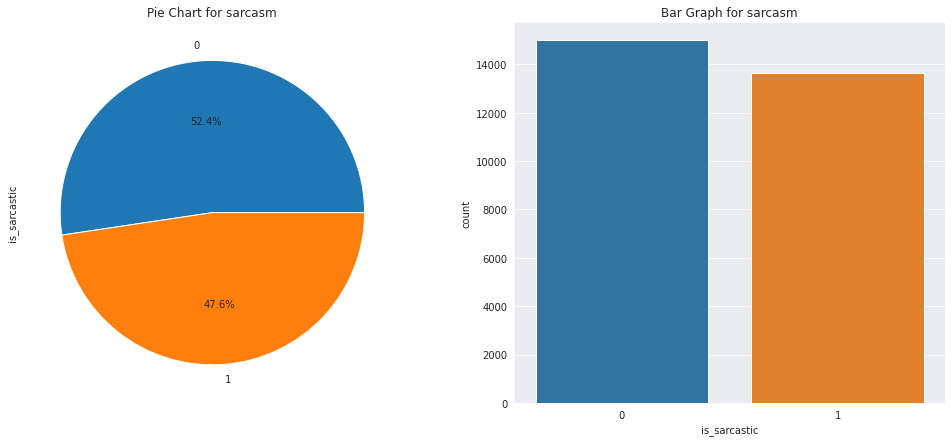

In [ ]:
# Understand the 'sentiment' the target vector
f,axes=plt.subplots(1,2,figsize=(17,7))
df['is_sarcastic'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('is_sarcastic',data=df,ax=axes[1])
axes[0].set_title('Pie Chart for sarcasm')
axes[1].set_title('Bar Graph for sarcasm')
plt.show()

So, We can see that the dataset is balanced. Its good for a classification task.

## 2. Retain relevant columns

In [ ]:
df = df[['headline', 'is_sarcastic']]
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clock of hair loss,1
1,"dem rep. totally nails why congress is falling short on gender, racial equality",0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting to work,1
4,mother comes pretty close to using word 'streaming' correctly,1


## 3. Get length of each sentence

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# Text Cleaning:
# We will not remove numbers from the text data right away, lets further analyse if they contain any relevant information
# We can find the entity type of the tokens in the sentences using Named Entity Recognition (NER), this will help us identify
# the type and relevance of numbers in our text data

stop_words = stopwords.words('english')
stop_words.remove('not')

def text_cleaning(x):
    
    headline = re.sub('\s+\n+', ' ', x)
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)
    
    return headline

In [ ]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

df['entity'] = df['headline'].progress_apply(get_entities)

100%|██████████| 28619/28619 [03:57<00:00, 120.73it/s]


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Dataset with entity, clean_headline and sentence_length
df['clean_headline'] = df['headline'].apply(text_cleaning)

df['sentence_length'] = df['clean_headline'].apply(lambda x: len(x.split()))
df

,headline,is_sarcastic,entity,clean_headline,sentence_length
0,thirtysomething scientists unveil doomsday clock of hair loss,1,DATE,thirtysomething scientists unveil doomsday clock hair loss,7
1,"dem rep. totally nails why congress is falling short on gender, racial equality",0,"ORG,ORG",dem rep totally nail congress fall short gender racial equality,10
2,eat your veggies: 9 deliciously different recipes,0,CARDINAL,eat veggies 9 deliciously different recipes,6
3,inclement weather prevents liar from getting to work,1,,inclement weather prevent liar get work,6
4,mother comes pretty close to using word 'streaming' correctly,1,,mother come pretty close use word stream correctly,8
...,...,...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,NORP,jews celebrate rosh hashasha something,5
28615,internal affairs investigator disappointed conspiracy doesn't go all the way to the top,1,,internal affairs investigator disappoint conspiracy go way top,8
28616,the most beautiful acceptance speech this week came from a queer korean,0,"DATE,NORP",beautiful acceptance speech week come queer korean,7
28617,mars probe destroyed by orbiting spielberg-gates space palace,1,,mar probe destroy orbit spielberg gate space palace,8


In [ ]:
# Headline length distribution
# Check for outliers in headline column
# Generally the headlines shouldn't be more than 20-40 words
# Box Plot

fig = px.histogram(df, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", marginal="box")
fig.show(renderer="colab")

In [ ]:
df[df['sentence_length']==107]['headline']

7302    hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet
Name: headline, dtype: object

In [ ]:
df.drop(df[df['sentence_length'] == 107].index, inplace = True)
df.reset_index(inplace=True, drop=True)

In [ ]:
# Headline length distribution: Outliers Removed
# The headlines after the removal of outliers do not exceed the limit of 20-40 words
# They are mostly centered in the range of 5-10 words
fig = px.histogram(df, x="sentence_length",height=700, color='is_sarcastic', title="Headlines Length Distribution", marginal="box")
fig.show(renderer="colab")

In [ ]:
# Filtering: Find Sentences that Contain Numbers
df['contains_number'] = df['clean_headline'].apply(lambda x: bool(re.search(r'\d+', x)))
df

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
0,thirtysomething scientists unveil doomsday clock of hair loss,1,DATE,thirtysomething scientists unveil doomsday clock hair loss,7,False
1,"dem rep. totally nails why congress is falling short on gender, racial equality",0,"ORG,ORG",dem rep totally nail congress fall short gender racial equality,10,False
2,eat your veggies: 9 deliciously different recipes,0,CARDINAL,eat veggies 9 deliciously different recipes,6,True
3,inclement weather prevents liar from getting to work,1,,inclement weather prevent liar get work,6,False
4,mother comes pretty close to using word 'streaming' correctly,1,,mother come pretty close use word stream correctly,8,False
...,...,...,...,...,...,...
28613,jews to celebrate rosh hashasha or something,1,NORP,jews celebrate rosh hashasha something,5,False
28614,internal affairs investigator disappointed conspiracy doesn't go all the way to the top,1,,internal affairs investigator disappoint conspiracy go way top,8,False
28615,the most beautiful acceptance speech this week came from a queer korean,0,"DATE,NORP",beautiful acceptance speech week come queer korean,7,False
28616,mars probe destroyed by orbiting spielberg-gates space palace,1,,mar probe destroy orbit spielberg gate space palace,8,False


Analysis of samples containing numbers of Time, Date or Cardinal Entity:
- The numbers in a text data can have different implications
- While the naive text preprocessing methods suggest that the numbers should be removed along with the special characters
- The entity type of these numbers should be identified to get their exact implications

In [ ]:
# Date Entity: Randome Samples
df[(df['contains_number']) & (df['sentence_length']<=5) & (df['entity']=='DATE')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
16369,"if you thought 2016 was terrible, you're actually in the minority",0,DATE,think 2016 terrible actually minority,5,True
25942,trump brags that he won most of the women's vote in 2016. he didn't.,0,DATE,trump brag women vote 2016,5,True
3590,what's ahead for reputation in 2015,0,DATE,ahead reputation 2015,3,True
26656,"news roundup for august 17, 2017",0,DATE,news roundup august 17 2017,5,True
15007,the 2016 'dumbing down' of america,0,DATE,2016 dumbing america,3,True
10120,the best teams in sports... 5 years from now,0,DATE,best team sport 5 years,5,True
24788,once upon a festival 2015 is upon us,0,DATE,upon festival 2015 upon us,5,True
6864,2016 perspectives from the festival of politics,0,DATE,2016 perspectives festival politics,4,True
21169,those we lost in 2011,1,DATE,lose 2011,2,True
15398,the best tv shows of 2014,0,DATE,best tv show 2014,4,True


In [ ]:
# Time Entity: Randome Samples
df[(df['contains_number']) & (df['sentence_length']<=5) & (df['entity']=='TIME')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
21538,jcpenney abandons 45-second sale,1,TIME,jcpenney abandon 45 second sale,5,True
13455,"it's just 15 minutes to a grown-up, but not to kids",0,TIME,15 minutes grow not kid,5,True
26822,email from mom sent at 5:32 a.m.,1,TIME,email mom send 5 32,5,True
12158,oven preheated for 16 seconds,1,TIME,oven preheat 16 second,4,True
25836,23-hour suicide watch a failure,1,TIME,23 hour suicide watch failure,5,True
2240,donut shop gets weird after 11 a.m.,1,TIME,donut shop get weird 11,5,True
3409,man turns vegetarian for 36 hours,1,TIME,man turn vegetarian 36 hours,5,True
19067,the 1 minute blog. protesters and looting.,0,TIME,1 minute blog protesters loot,5,True
18283,5-minute hairstyles -- for real!,0,TIME,5 minute hairstyles real,4,True
2961,"how to be nicer, healthier and more focused in 15 minutes",0,TIME,nicer healthier focus 15 minutes,5,True


In [ ]:
# Cardinal Entity: Randome Samples
df[(df['contains_number']) & (df['sentence_length']<=5) & (df['entity']=='CARDINAL')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
25261,senator's myspace top 8 all corporations,1,CARDINAL,senator myspace top 8 corporations,5,True
8241,10 of illinois' safest cities,0,CARDINAL,10 illinois safest cities,4,True
7715,5 viruses that are scarier than ebola,0,CARDINAL,5 viruses scarier ebola,4,True
9351,7 strategies for lasting fat loss,0,CARDINAL,7 strategies last fat loss,5,True
6783,347 locals identify slain prostitute,1,CARDINAL,347 locals identify slay prostitute,5,True
13517,9 things smart people won't do,0,CARDINAL,9 things smart people,4,True
624,10 things not to do before your next race,0,CARDINAL,10 things not next race,5,True
25754,6 signs you're in a band-aid relationship (and what to do about it),0,CARDINAL,6 sign band aid relationship,5,True
10224,5 lessons from chibok,0,CARDINAL,5 lessons chibok,3,True
20441,my beautiful reward and the 7 lessons it has taught me,0,CARDINAL,beautiful reward 7 lessons teach,5,True


**Inference from NER:**
- For some headlines, its important to retain the date, time and cardinal information
- Special tokenization can be considered to retain the meaning of these numbers
- Vocab size can be reduced further by removing these numbers
- More research is required to improve the quality of vectorization and modeling performance


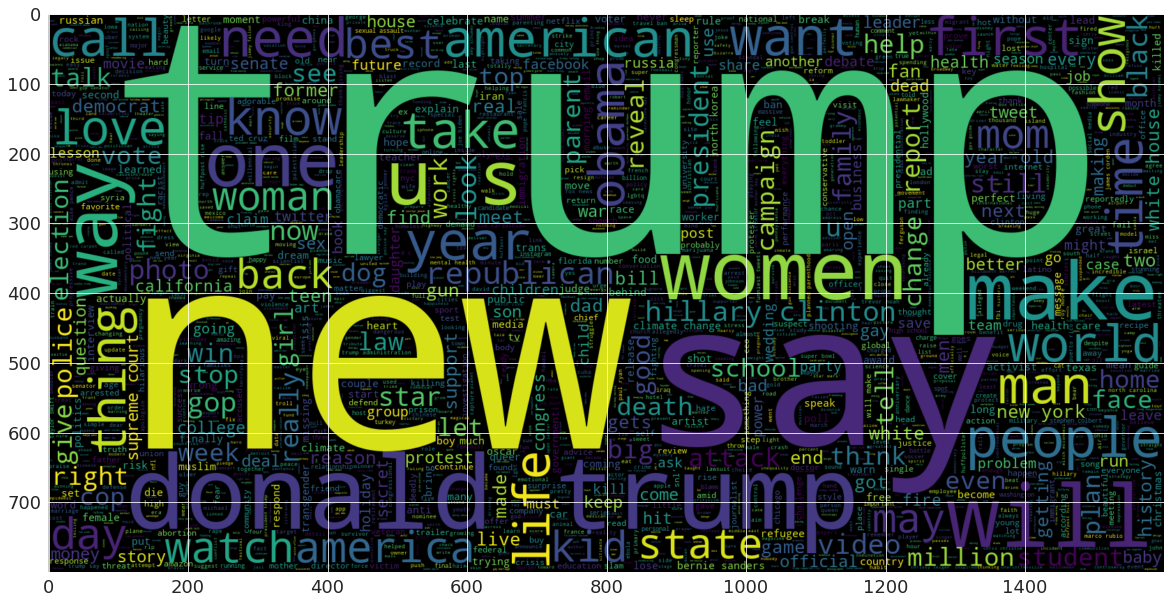

In [ ]:
# Wordcloud for text that is Not Sarcastic (LABEL - 0)
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

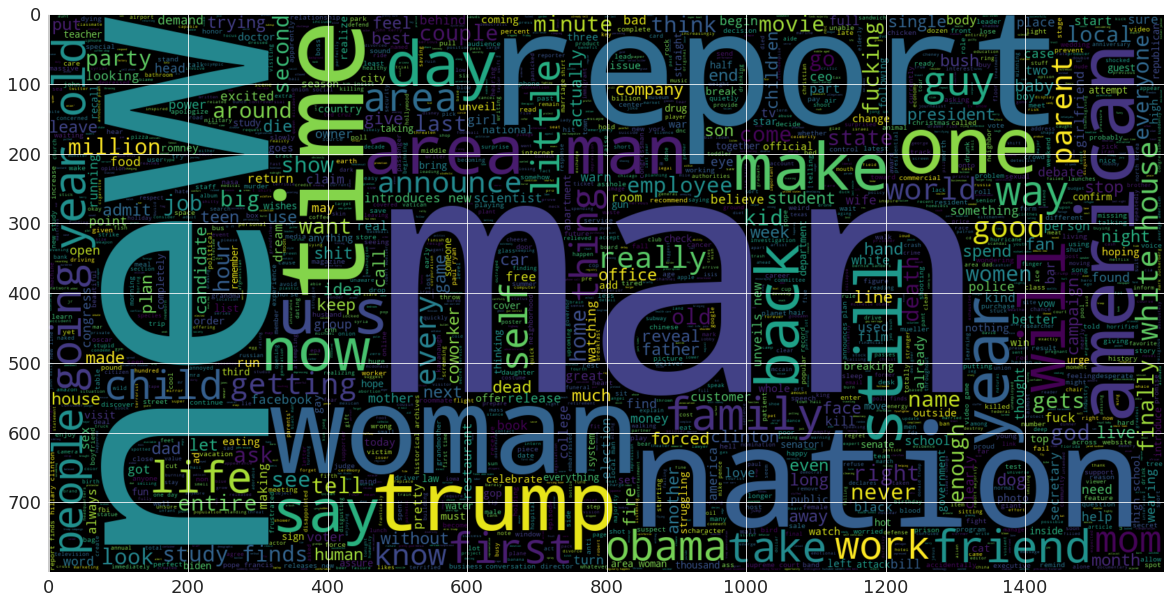

In [ ]:
# Wordcloud for text that is Sarcastic (LABEL - 1)
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

## 4. Define parameters

## 5. Get indices for words

## 6. Create features and labels

## 7. Get vocabulary size

## 8. Create a weight matrix using GloVe embeddings

## 9. Define and compile a Bidirectional LSTM model.
Hint: Be analytical and experimental here in trying new approaches to design the best model.

## 10. Fit the model and check the validation accuracy

**Considering the above 4, 5, 6, 7, 8, 9, 10 parts together in below code cells:**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional, SimpleRNN, GRU, Conv1D,  MultiHeadAttention, AveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
X = df['clean_headline']
y = df['is_sarcastic']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Tokenization
# Splitting sentences into words
# Finding the vocab size
# Important Parameters to consider
max_len = 20  
embedding_dim = 50     
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  18276


In [ ]:
# Encoding of Inputs
# Converting the sentences to token followed by padded sequences in encoded format
# These are numeric encodings assigned to each word
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [ ]:
X_train[0]

array([ 813, 1144, 2021,  487,  294, 2272,   25,  333,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
y_train[0]

1

In [ ]:
# # Path of the data file
# path = 'glove.6B.zip'

# # Unzip files in the current directory

# with ZipFile (path,'r') as z:
#   z.extractall() 
# print("Training zip extraction done!")

In [ ]:
# Embedding matrix with 50 dimensions
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

vocab_size = len(tokenizer.word_index)+1

# Creating a embedding matrix for initial weights based on the precreated glove embedding

embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### ANN

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = max_len))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 50)            913800    
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 917,129
Trainable params: 917,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/10
157/157 [==============================] - 20s 91ms/step - loss: 0.6250 - accuracy: 0.6622 - val_loss: 0.5719 - val_accuracy: 0.7021
Epoch 2/10
157/157 [==============================] - 4s 24ms/step - loss: 0.5041 - accuracy: 0.7558 - val_loss: 0.4951 - val_accuracy: 0.7607
Epoch 3/10
157/157 [==============================] - 3s 16ms/step - loss: 0.4152 - accuracy: 0.8124 - val_loss: 0.4598 - val_accuracy: 0.7828
Epoch 4/10
157/157 [==============================] - 3s 19ms/step - loss: 0.3483 - accuracy: 0.8472 - val_loss: 0.4476 - val_accuracy: 0.7918
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 0.2932 - accuracy: 0.8763 - val_loss: 0.4550 - val_accuracy: 0.7955
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.2498 - accuracy: 0.8985 - val_loss: 0.4646 - val_accuracy: 0.7966
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 0.2125 - accuracy: 0.9157 - val_loss: 0.4949 - val_accuracy: 0.7949

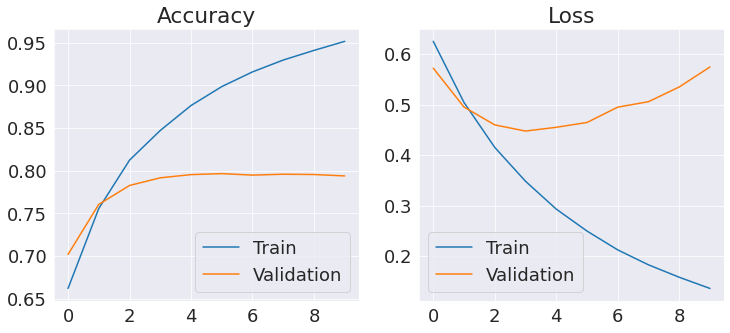

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

269/269 [==============================] - 1s 2ms/step


Classification Accuracy:
626/626 [==============================] - 2s 3ms/step - loss: 0.1098 - accuracy: 0.9650
Loss and Accuracy on Training data: [0.1098141148686409, 0.9650059938430786]
269/269 [==============================] - 1s 3ms/step - loss: 0.5744 - accuracy: 0.7940
Loss and Accuracy on Test data: [0.5743972659111023, 0.7939669489860535]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      4514
           1       0.80      0.76      0.78      4072

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Confusion Matrix Chart:


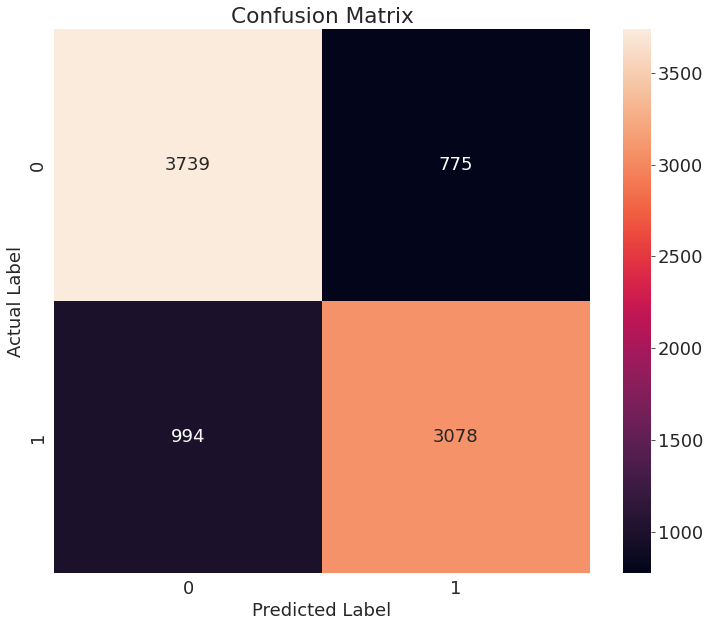

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

base_1 = []
base_1.append(['ANN', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

269/269 [==============================] - 1s 2ms/step - loss: 0.5744 - accuracy: 0.7940


### RNN

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = max_len))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(AveragePooling1D(pool_size = 2))
# model.add(Bidirectional(SimpleRNN(64, dropout = 0.5)))
model.add((SimpleRNN(64, dropout = 0.5)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test), verbose=1)

Epoch 1/10
157/157 [==============================] - 21s 87ms/step - loss: 0.6261 - accuracy: 0.6423 - val_loss: 0.5682 - val_accuracy: 0.7052
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.5309 - accuracy: 0.7375 - val_loss: 0.5032 - val_accuracy: 0.7568
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 0.4556 - accuracy: 0.7898 - val_loss: 0.4620 - val_accuracy: 0.7853
Epoch 4/10
157/157 [==============================] - 5s 35ms/step - loss: 0.3903 - accuracy: 0.8278 - val_loss: 0.4557 - val_accuracy: 0.7983
Epoch 5/10
157/157 [==============================] - 4s 24ms/step - loss: 0.3398 - accuracy: 0.8560 - val_loss: 0.4444 - val_accuracy: 0.8027
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2925 - accuracy: 0.8779 - val_loss: 0.4462 - val_accuracy: 0.8058
Epoch 7/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2441 - accuracy: 0.9043 - val_loss: 0.4407 - val_accuracy: 0.805

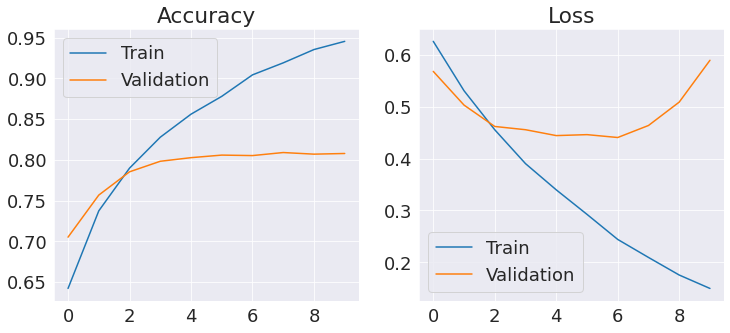

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

269/269 [==============================] - 1s 3ms/step


Classification Accuracy:
626/626 [==============================] - 3s 4ms/step - loss: 0.0825 - accuracy: 0.9732
Loss and Accuracy on Training data: [0.08250616490840912, 0.9731928706169128]
269/269 [==============================] - 2s 6ms/step - loss: 0.5896 - accuracy: 0.8078
Loss and Accuracy on Test data: [0.5896381735801697, 0.8078266978263855]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      4514
           1       0.81      0.78      0.79      4072

    accuracy                           0.81      8586
   macro avg       0.81      0.81      0.81      8586
weighted avg       0.81      0.81      0.81      8586

Confusion Matrix Chart:


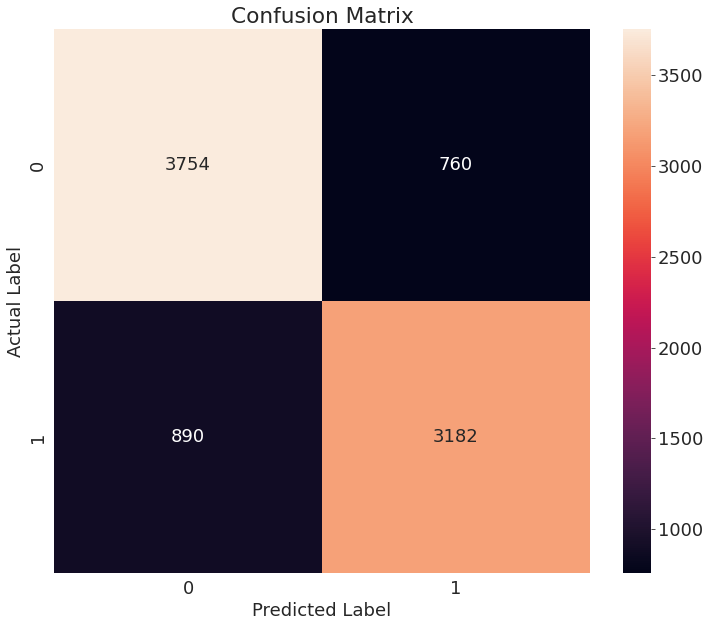

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['RNN', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

269/269 [==============================] - 1s 4ms/step - loss: 0.5896 - accuracy: 0.8078


### GRU

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = max_len))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(AveragePooling1D(pool_size = 2))
# model.add(Bidirectional(GRU(32, dropout = 0.5)))
model.add((GRU(64, dropout = 0.5)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test), verbose=1)

Epoch 1/10
157/157 [==============================] - 14s 70ms/step - loss: 0.6116 - accuracy: 0.6621 - val_loss: 0.5454 - val_accuracy: 0.7234
Epoch 2/10
157/157 [==============================] - 4s 24ms/step - loss: 0.4973 - accuracy: 0.7589 - val_loss: 0.4767 - val_accuracy: 0.7697
Epoch 3/10
157/157 [==============================] - 3s 19ms/step - loss: 0.4163 - accuracy: 0.8123 - val_loss: 0.4491 - val_accuracy: 0.7906
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3506 - accuracy: 0.8471 - val_loss: 0.4262 - val_accuracy: 0.8018
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 0.2955 - accuracy: 0.8751 - val_loss: 0.4531 - val_accuracy: 0.8050
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.2492 - accuracy: 0.8970 - val_loss: 0.4345 - val_accuracy: 0.8072
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.2054 - accuracy: 0.9193 - val_loss: 0.4830 - val_accuracy: 0.8020


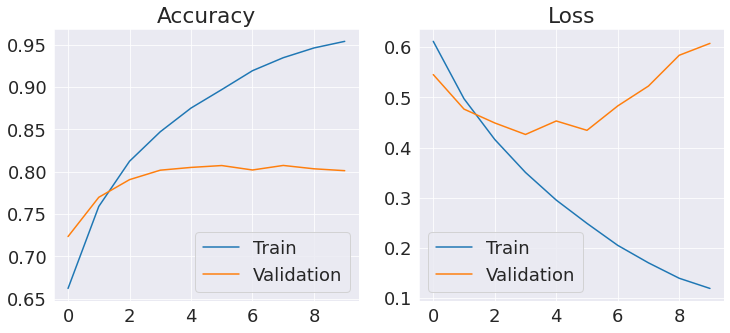

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

269/269 [==============================] - 1s 2ms/step


Classification Accuracy:
626/626 [==============================] - 3s 4ms/step - loss: 0.0673 - accuracy: 0.9789
Loss and Accuracy on Training data: [0.06728716194629669, 0.9788838028907776]
269/269 [==============================] - 1s 4ms/step - loss: 0.6076 - accuracy: 0.8012
Loss and Accuracy on Test data: [0.6075868606567383, 0.8011879920959473]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      4514
           1       0.83      0.73      0.78      4072

    accuracy                           0.80      8586
   macro avg       0.80      0.80      0.80      8586
weighted avg       0.80      0.80      0.80      8586

Confusion Matrix Chart:


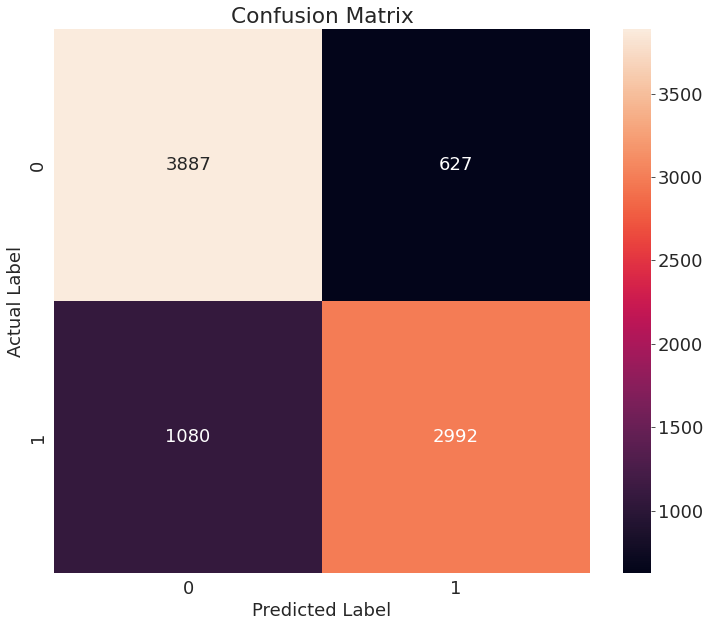

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['GRU', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

269/269 [==============================] - 1s 3ms/step - loss: 0.6076 - accuracy: 0.8012


### LSTM

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = max_len))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(AveragePooling1D(pool_size = 2))
model.add(Bidirectional(LSTM(64, dropout = 0.5)))
# model.add((LSTM(32, dropout = 0.5)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

H = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_test, y_test), verbose=1)

Epoch 1/10
157/157 [==============================] - 16s 74ms/step - loss: 0.5992 - accuracy: 0.6712 - val_loss: 0.5304 - val_accuracy: 0.7345
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.4799 - accuracy: 0.7677 - val_loss: 0.4624 - val_accuracy: 0.7807
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 0.3876 - accuracy: 0.8238 - val_loss: 0.4312 - val_accuracy: 0.8000
Epoch 4/10
157/157 [==============================] - 3s 17ms/step - loss: 0.3139 - accuracy: 0.8660 - val_loss: 0.4350 - val_accuracy: 0.8119
Epoch 5/10
157/157 [==============================] - 2s 13ms/step - loss: 0.2484 - accuracy: 0.8985 - val_loss: 0.4459 - val_accuracy: 0.8116
Epoch 6/10
157/157 [==============================] - 2s 15ms/step - loss: 0.1965 - accuracy: 0.9216 - val_loss: 0.4713 - val_accuracy: 0.8152
Epoch 7/10
157/157 [==============================] - 2s 13ms/step - loss: 0.1566 - accuracy: 0.9393 - val_loss: 0.5337 - val_accuracy: 0.810

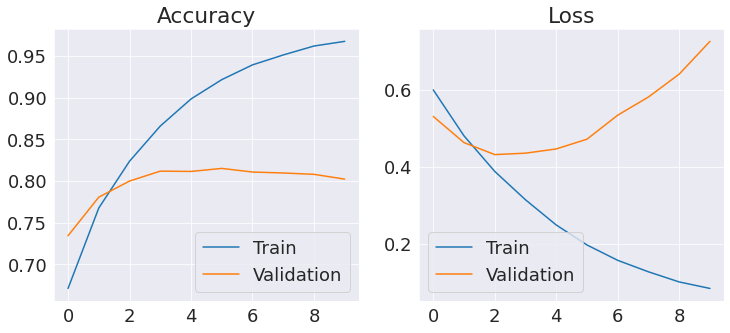

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(H.history['accuracy'], label = 'Train')
plt.plot(H.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label = 'Train')
plt.plot(H.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

269/269 [==============================] - 2s 3ms/step


Classification Accuracy:
626/626 [==============================] - 3s 5ms/step - loss: 0.0391 - accuracy: 0.9889
Loss and Accuracy on Training data: [0.03913184627890587, 0.9889177083969116]
269/269 [==============================] - 2s 6ms/step - loss: 0.7254 - accuracy: 0.8024
Loss and Accuracy on Test data: [0.7253589630126953, 0.8023526668548584]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82      4514
           1       0.81      0.76      0.78      4072

    accuracy                           0.80      8586
   macro avg       0.80      0.80      0.80      8586
weighted avg       0.80      0.80      0.80      8586

Confusion Matrix Chart:


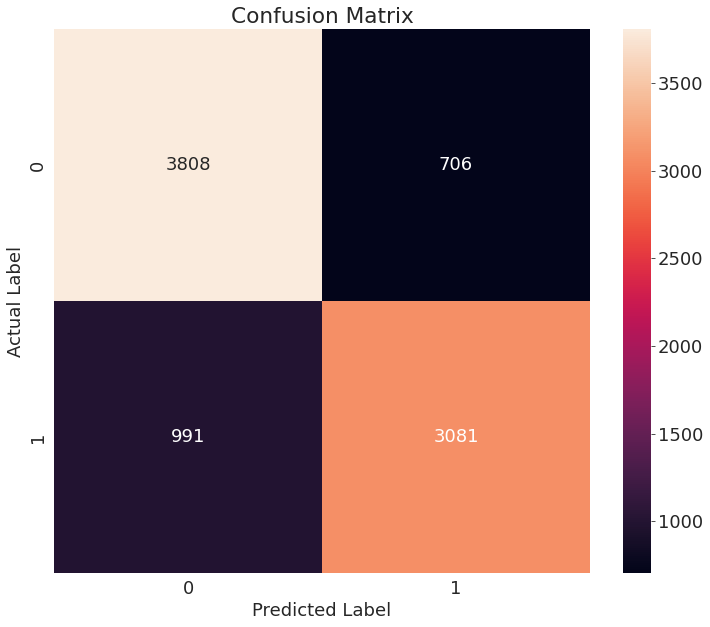

In [ ]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Model Comparison

In [ ]:
# Model comparison
precision = precision_score(y_test,y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test,y_pred, average='macro')

Train_Accuracy = model.evaluate(X_train, y_train)
Test_Accuracy = model.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['LSTM', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)
model_comparison

269/269 [==============================] - 1s 4ms/step - loss: 0.7254 - accuracy: 0.8024


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
1,RNN,0.973193,0.807827,0.807780,0.806535,0.806970
3,LSTM,0.988918,0.802353,0.803536,0.800114,0.800925
2,GRU,0.978884,0.801188,0.804656,0.797936,0.799004
0,ANN,0.965006,0.793967,0.794422,0.792103,0.792739


### BERT

In [ ]:
df1 = df[['clean_headline', 'is_sarcastic']]
df1.head()

,clean_headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clock hair loss,1
1,dem rep totally nail congress fall short gender racial equality,0
2,eat veggies 9 deliciously different recipes,0
3,inclement weather prevent liar get work,1
4,mother come pretty close use word stream correctly,1


In [ ]:
# Split the data for training and testing
# To be used in the transformers (BERT)
train, test = train_test_split(df1, test_size=0.5, random_state=0)

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
# Install Transformers library
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.5 MB/s eta 0:00:00


In [ ]:
# Load the BERT Classifier and Tokenizer alıng with Input modules
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# We have the main BERT model, a dropout layer to prevent overfitting, and finally a dense layer for classification task:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We have two pandas Dataframe objects waiting for us to convert them into suitable objects for the BERT model. 
# We will take advantage of the InputExample function that helps us to create sequences from our dataset. 
# The InputExample function can be called as follows:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

Now we will create two main functions:
1. convert_data_to_examples: This will accept our train and test datasets and convert each row into an InputExample object.
2. convert_examples_to_tf_dataset: This function will tokenize the InputExample objects, then create the required input format with the tokenized objects, finally, create an input dataset that we can feed to the model.

In [ ]:
def convert_data_to_examples(train, test, clean_headline, is_sarcastic): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[clean_headline], 
                                                          text_b = None,
                                                          label = x[is_sarcastic]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[clean_headline], 
                                                          text_b = None,
                                                          label = x[is_sarcastic]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'clean_headline', 
                                                                           'is_sarcastic')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


clean_headline = 'clean_headline'
is_sarcastic = 'is_sarcastic'

In [ ]:
# Our dataset containing processed input sequences are ready to be fed to the model.
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, clean_headline, is_sarcastic)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

In [ ]:
# We will use Adam as our optimizer, CategoricalCrossentropy as our loss function, and SparseCategoricalAccuracy as our accuracy metric. 
# Fine-tuning the model for 2 epochs will give us around 90% accuracy, which is great.

# Training the model might take a while, so ensure you enabled the GPU acceleration from the Notebook Settings.

%%time

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

H = model.fit(train_data, epochs=2, validation_data=validation_data)

# 30 min for maxlen = 128

Epoch 1/2
896/896 [==============================] - 922s 941ms/step - loss: 0.3645 - accuracy: 0.8313 - val_loss: 0.3927 - val_accuracy: 0.8394
Epoch 2/2
896/896 [==============================] - 834s 931ms/step - loss: 0.0924 - accuracy: 0.9670 - val_loss: 0.4919 - val_accuracy: 0.8498
CPU times: user 15min 1s, sys: 5min 11s, total: 20min 13s
Wall time: 29min 16s


## 6. Use the designed model to print the prediction on any one sample.

In [ ]:
# Making Predictions
# I created a list of two reviews I created. The first one is a sarcastic review, while the second one is cnot sarcastic.
pred_sentences = ['What planet did you come from?',
                  'This is really a very beautiful pic']

In [ ]:
# We need to tokenize our reviews with our pre-trained BERT tokenizer. We will then feed these tokenized sequences to our model
# and run a final softmax layer to get the predictions. We can then use the argmax function to determine whether our sentiment 
# prediction for the review is positive or negative. Finally, we will print out the results with a simple for loop. 
# The following lines do all of these said operations:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['0','1']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

What planet did you come from? : 
 0
This is really a very beautiful pic : 
 0


In [ ]:
# Using the BERT on 5 test samples
predict_set = test[0:5]
pred_sentences = list(predict_set['clean_headline'])

tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['0','1']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

exasperate huckabee sanders remind press corps children 14 feel pain : 
 1
tampon ads honest : 
 0
moviegoer manage sneak candy past teenage usher earn 7 hour : 
 1
noaa predict see hurricanes year 2015 : 
 0
new lawn care product make neighbor lawn less green : 
 1


## Conclusion:

- In this notebook, We used text preprocessing to prepare the data and make 
it compatible for vaious ML/DL models alongwith the required EDA.
- Compared performances of various models like ANN, RNN, GRU, LSTM and BERT.
- Using hyperparameter tuning, we can further improve the performance of various models.
- Text cleaning by considering the NER aspects can further improve the model performance
- More advanced transformers can also be tried in this project


# References:

1. [Towards Data Science](https://towardsdatascience.com)
2. [Kaggle. Kaggle Code](https://www.kaggle.com/code)
3. [KdNuggets](https://www.kdnuggets.com/)
4. [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/)
5. [Wikipedia](https://en.wikipedia.org/)
6. [Numpy](https://numpy.org/)
7. [Pandas](https://pandas.pydata.org/)
8. [SciPy](https://scipy.org/)
9. [MatplotLib](https://matplotlib.org/)
10. [Seaborn](https://seaborn.pydata.org/)
11. [Python](https://www.python.org/)
12. [Plotly](https://plotly.com/)
13. [Bokeh](https://docs.bokeh.org/en/latest/)
14. [RStudio](https://www.rstudio.com/)
15. [MiniTab](https://www.minitab.com/en-us/)
16. [Anaconda](https://www.anaconda.com/)
17. [PapersWithCode](https://paperswithcode.com/)